### Importación de datos



In [15]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [16]:
df = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

df = pd.concat([df, df2, df3, df4])
df

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359
2354,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980
2355,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2356,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250


In [17]:
df = pd.read_csv(url)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

df['Tienda'] = 'Tienda 1'
df2['Tienda'] = 'Tienda 2'
df3['Tienda'] = 'Tienda 3'
df4['Tienda'] = 'Tienda 4'

df = pd.concat([df, df2, df3, df4])

# Hacemos group by tienda y sum precio
df_show = df.groupby("Tienda")["Precio"].sum()

# Cambiamos el formato del número
df_show = df_show.apply(lambda x: "{:,.0f}".format(x))

# Cambiar , por .
#df_show = df_show.str.replace(",", ".")

df_show

,Precio
Tienda,
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


In [18]:
facturacionTotal_tienda1 = sum(tienda['Precio'])
facturacionTotal_tienda2 = sum(tienda2['Precio'])
facturacionTotal_tienda3 = sum(tienda3['Precio'])
facturacionTotal_tienda4 = sum(tienda4['Precio'])
facturacionTotal_Negocio = sum(df['Precio'])

print(f'Facturacion total (Tienda 1): ${facturacionTotal_tienda1:,.2f}')
print(f'Facturacion total (Tienda 2): ${facturacionTotal_tienda2:,.2f}')
print(f'Facturacion total (Tienda 3): ${facturacionTotal_tienda3:,.2f}')
print(f'Facturacion total (Tienda 4): ${facturacionTotal_tienda4:,.2f}')
print(f'Facturacion total (Factura): ${facturacionTotal_Negocio:,.2f}')


Facturacion total (Tienda 1): $1,150,880,400.00
Facturacion total (Tienda 2): $1,116,343,500.00
Facturacion total (Tienda 3): $1,098,019,600.00
Facturacion total (Tienda 4): $1,038,375,700.00
Facturacion total (Factura): $4,403,619,200.00


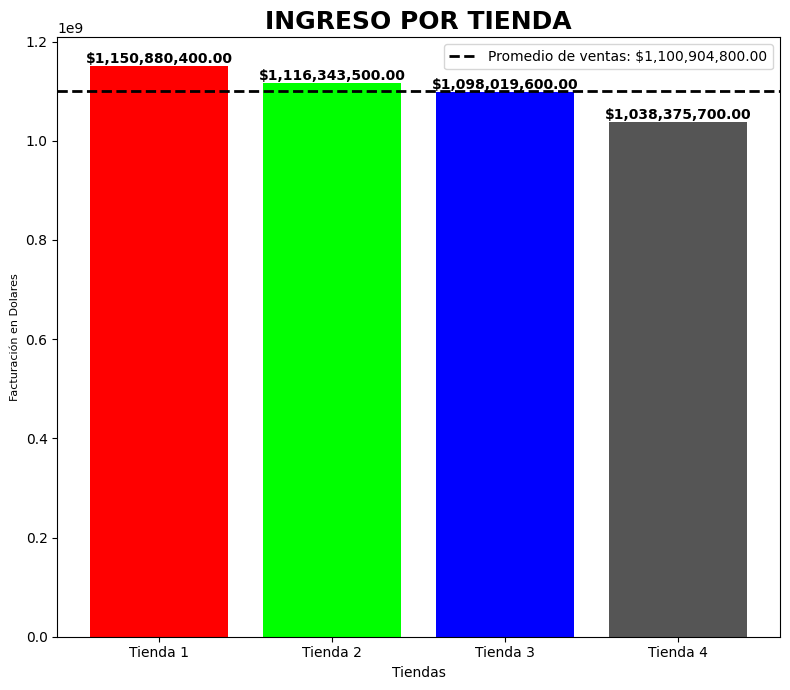

In [19]:
import matplotlib.pyplot as plt

facturaciones = [
    facturacionTotal_tienda1,
    facturacionTotal_tienda2,
    facturacionTotal_tienda3,
    facturacionTotal_tienda4
]
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
nombres_tiendas = list(tiendas.keys())
colores = ['#FF0000', '#00FF00', '#0000FF', '#555555']

plt.figure(figsize=(8, 7))
barras = plt.bar(nombres_tiendas, facturaciones, color=colores)


plt.title('INGRESO POR TIENDA', fontsize=18, fontweight='bold')
plt.ylabel('Facturación en Dolares', fontsize=8)
plt.xlabel('Tiendas', fontsize=10)



promedio_facturacion = sum(facturaciones) / len(facturaciones)
plt.axhline(promedio_facturacion, color='black', linestyle='--', linewidth=2.0, label=f'Promedio de ventas: ${promedio_facturacion:,.2f}')
plt.legend()


for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 100, f"${altura:,.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

En se ha calculado la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [20]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df in tiendas.items():
    print(f"   Resultados para {nombre}   ")


    ventas_por_categoria = (
        df.groupby("Categoría del Producto")
        .size()
        .reset_index(name="Total Ventas")
        .sort_values(by="Total Ventas", ascending=False)
        .reset_index(drop=True)
    )

    categoria_mas_vendida = ventas_por_categoria.iloc[0]["Categoría del Producto"]

    styled_table = (
        ventas_por_categoria.style
        .hide(axis="index")
        .set_caption(f"Ventas x categoría en {nombre}")
        .format({"Total Ventas": "{:,.0f}"})
        .set_caption(f"Categoría más vendida: {categoria_mas_vendida}")
    )

    display(styled_table)
    print("\n" + "__"*50 + "\n")


   Resultados para Tienda 1   


Categoría del Producto,Total Ventas
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171



____________________________________________________________________________________________________

   Resultados para Tienda 2   


Categoría del Producto,Total Ventas
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181



____________________________________________________________________________________________________

   Resultados para Tienda 3   


Categoría del Producto,Total Ventas
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177



____________________________________________________________________________________________________

   Resultados para Tienda 4   


Categoría del Producto,Total Ventas
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170



____________________________________________________________________________________________________



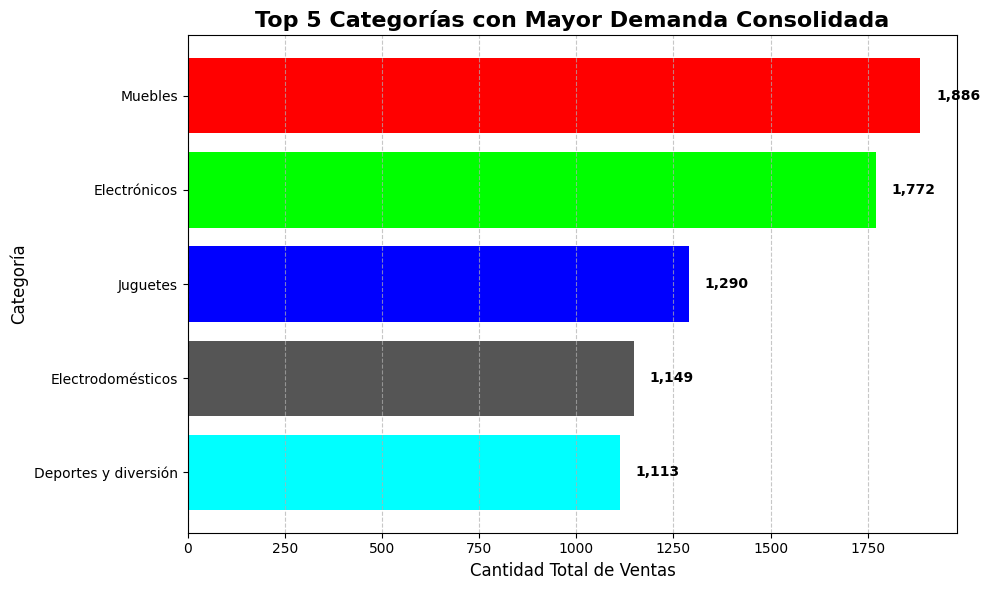

In [21]:
import matplotlib.pyplot as plt

ventas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4])

ventas_por_categoria = (
    ventas_combinadas.groupby("Categoría del Producto")
    .size()
    .reset_index(name="Total Ventas")
    .sort_values(by="Total Ventas", ascending=False)
)

top5_categorias = ventas_por_categoria.head(5)

plt.figure(figsize=(10, 6))
colors = ['#FF0000', '#00FF00', '#0000FF', '#555555','#00FFFF']
barras = plt.barh(
    top5_categorias["Categoría del Producto"],
    top5_categorias["Total Ventas"],
    color=colors
)

plt.title("Top 5 Categorías con Mayor Demanda Consolidada", fontsize=16, fontweight='bold')
plt.xlabel("Cantidad Total de Ventas", fontsize=12)
plt.ylabel("Categoría", fontsize=12)
plt.gca().invert_yaxis()  # Para mostrar la más vendida arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Etiquetas con formato profesional
for barra in barras:
    ancho = barra.get_width()
    plt.text(
        ancho + 40,
        barra.get_y() + barra.get_height() / 2,
        f"{int(ancho):,}",
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [22]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
medias = []

for nombre, df in tiendas.items():
    media = df['Calificación'].mean()
    medias.append({
        "Tienda": nombre,
        "Media de Calificación": media
    })

df_medias = pd.DataFrame(medias).round(2)
styled_table = (
    df_medias.style
    .hide(axis="index")
    .set_caption("MEDIA DE CALIFICACIONES POR TIENDA")
    .background_gradient(cmap='Blues', subset=["Media de Calificación"])
    .format({
        "Media de Calificación": "{:.2f} "
    })
)

display(styled_table)

Tienda,Media de Calificación
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


# 4. Productos más y menos vendidos


=== Top 5 Productos más vendidos por Tienda ===

Tienda 1


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56


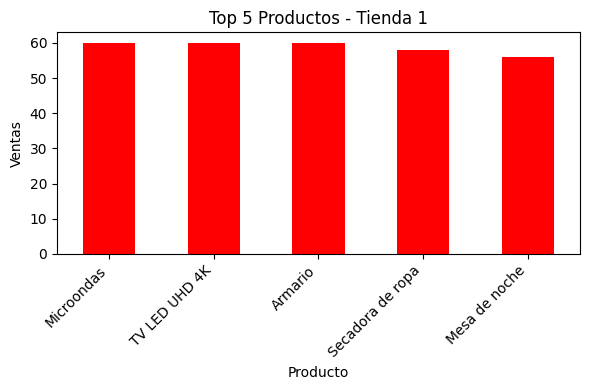


Tienda 2


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58


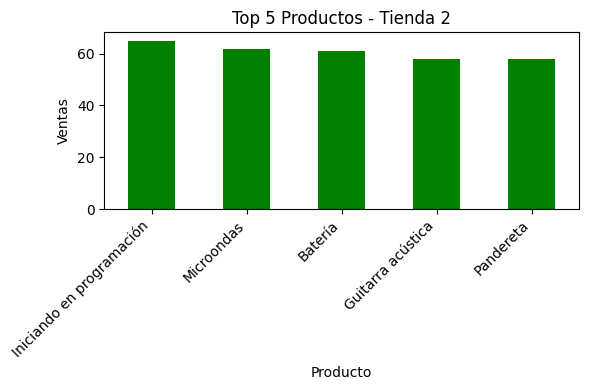


Tienda 3


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


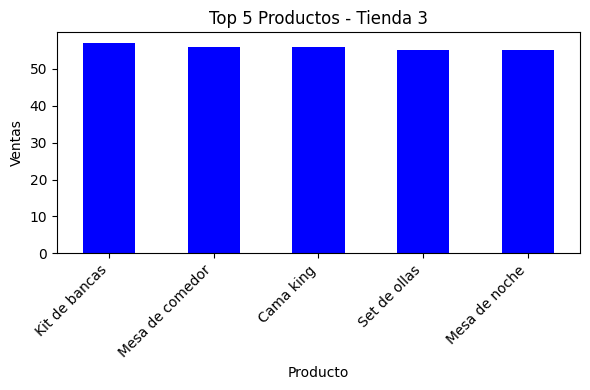


Tienda 4


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55


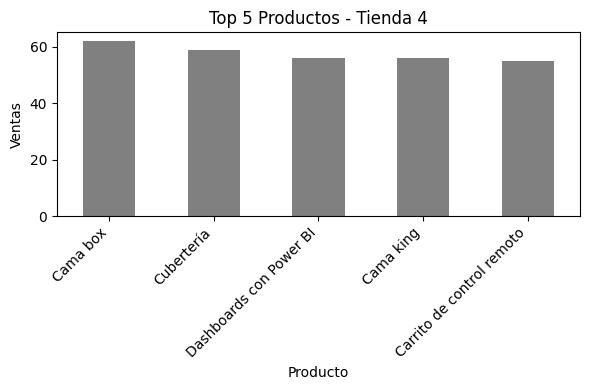

In [28]:
# Importamos la librería para generar gráficos
import matplotlib.pyplot as plt

# Mensaje informativo en consola
print("\n=== Top 5 Productos más vendidos por Tienda ===")

# Diccionario para almacenar el top 5 por tienda
top5 = {}

# Lista de colores para los gráficos (uno diferente por tienda)
colores = ['red', 'green', 'blue', 'grey', 'cian', 'gold', 'tomato', 'turquoise']

# Iteramos por cada tienda y su DataFrame asociado
for i, (nombre, df) in enumerate(tiendas.items()):
    # Obtenemos el top 5 productos más vendidos usando value_counts()
    top5[nombre] = df['Producto'].value_counts().head(5)

    # Mostramos el nombre de la tienda y la tabla del top 5
    print(f"\n{nombre}")
    display(top5[nombre])

    # Creamos una figura para el gráfico de barras
    plt.figure(figsize=(6,4))

    # Generamos el gráfico con un color distinto para cada tienda
    top5[nombre].plot(kind='bar', color=colores[i % len(colores)])  # % permite reciclar colores si hay más tiendas

    # Añadimos título y etiquetas
    plt.title(f'Top 5 Productos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')

    # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45, ha='right')

    # Ajustamos el diseño para evitar que se recorten elementos
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()




=== Top 5 Productos menos vendidos por Tienda ===

Tienda 1


,count
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


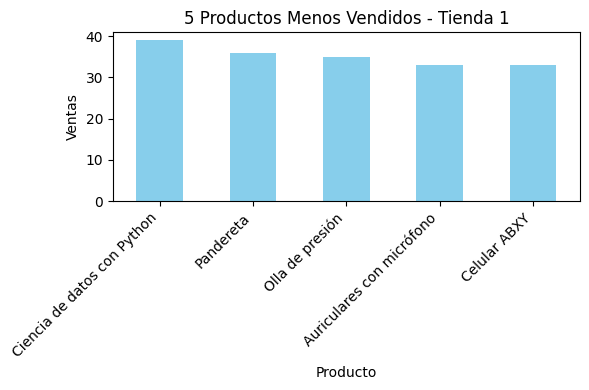


Tienda 2


,count
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


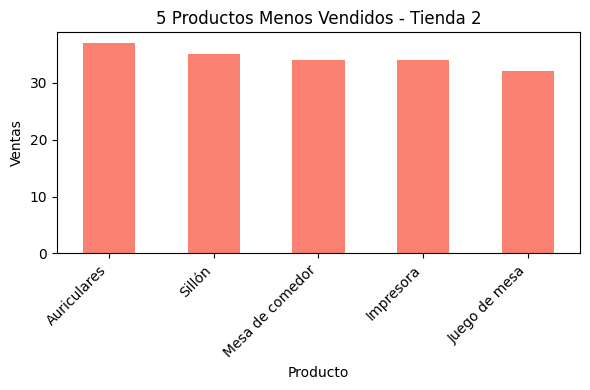


Tienda 3


,count
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


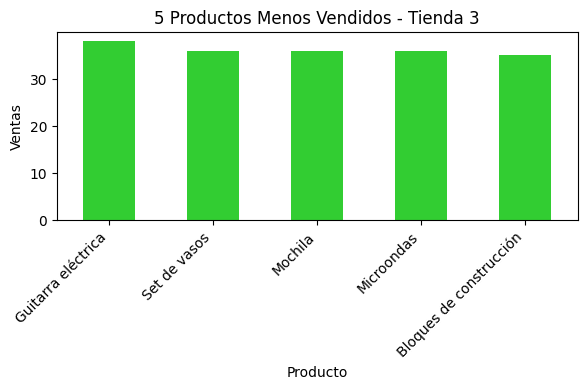


Tienda 4


,count
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


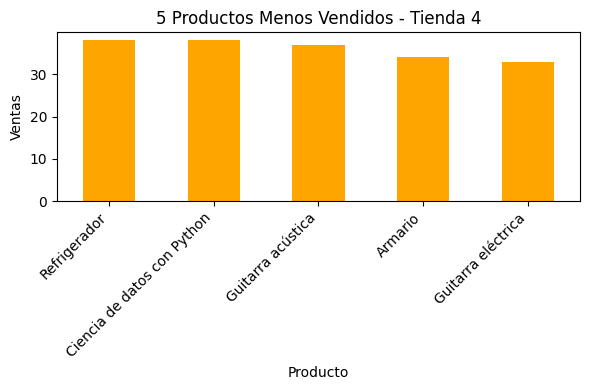

In [29]:
# Mensaje informativo en consola
print("\n=== Top 5 Productos menos vendidos por Tienda ===")

# Diccionario para almacenar el bottom 5 por tienda
bottom5 = {}

# Lista de colores para los gráficos (uno diferente por tienda)
colores = ['skyblue', 'salmon', 'limegreen', 'orange', 'mediumpurple', 'gold', 'tomato', 'turquoise']

# Iteramos por cada tienda y su DataFrame asociado
for i, (nombre, df) in enumerate(tiendas.items()):
    # Obtenemos los 5 productos menos vendidos usando value_counts() y tail()
    bottom5[nombre] = df['Producto'].value_counts().tail(5)

    # Mostramos el nombre de la tienda y la tabla del bottom 5
    print(f"\n{nombre}")
    display(bottom5[nombre])

    # Creamos una figura para el gráfico de barras
    plt.figure(figsize=(6,4))

    # Generamos el gráfico con un color distinto para cada tienda
    bottom5[nombre].plot(kind='bar', color=colores[i % len(colores)])  # % permite reciclar colores si hay más tiendas

    # Añadimos título y etiquetas
    plt.title(f'5 Productos Menos Vendidos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')

    # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45, ha='right')

    # Ajustamos el diseño para evitar que se recorten elementos
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()

# 5. Envío promedio por tienda


 Comparación de Costo de Envío Promedio entre Tiendas 


,Tienda,Costo Envío Promedio (COP)
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


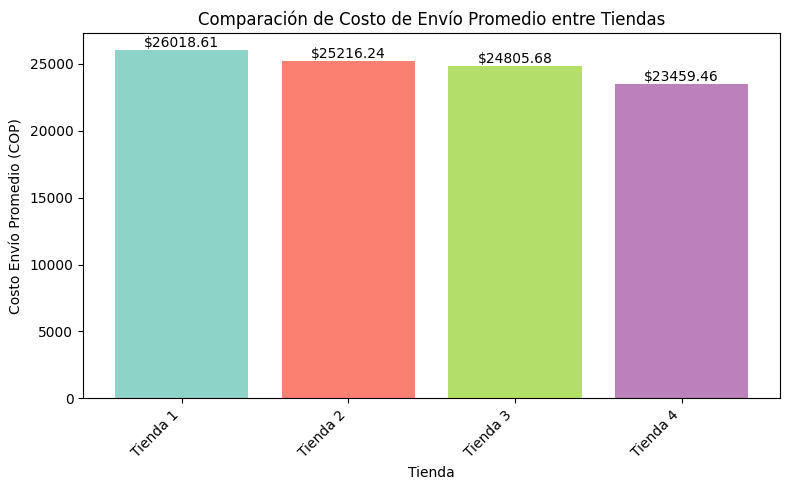

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Cálculo del costo de envío promedio para cada tienda
envio_promedio = {nombre: df['Costo de envío'].mean() for nombre, df in tiendas.items()}
envio_prom_df = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Costo Envío Promedio (COP)'])

# Formatear los valores en la columna 'Costo Envío Promedio (COP)' para que se muestren con dos decimales
envio_prom_df['Costo Envío Promedio (COP)'] = envio_prom_df['Costo Envío Promedio (COP)'].apply(lambda x: f'{x:.2f}')

# Mostrar la tabla con los valores formateados
print("\n Comparación de Costo de Envío Promedio entre Tiendas ")
display(envio_prom_df)

# Crear el gráfico de barras
plt.figure(figsize=(8,5))

# Definir los colores para las barras usando la paleta 'Set3' de Matplotlib
colores = mpl.colormaps['Set3']
nombres = envio_prom_df['Tienda']
colores_barra = [colores(i / len(nombres)) for i in range(len(nombres))]

# Crear las barras
bars = plt.bar(envio_prom_df['Tienda'], envio_prom_df['Costo Envío Promedio (COP)'].astype(float), color=colores_barra)

# Añadir título y etiquetas
plt.title('Comparación de Costo de Envío Promedio entre Tiendas')
plt.xlabel('Tienda')
plt.ylabel('Costo Envío Promedio (COP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir los valores de costo de envío encima de cada barra, con formato a dos decimales
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:.2f}',  # Formato con dos decimales
        ha='center',
        va='bottom'
    )

# Mostrar el gráfico
plt.show()

# INFORME FINAL: <br>

El presente informe detalle el analisis de datos de las Tienda 1, Tienda 2, Tienda 3 y Tienda 4, pertenecientes a la Cadena de Tienda de Don Juan. El objetivo del presente es determinar cual de las tiendas se recomienda vender, basados en el analisis de los datos y los gráficos generados, se ha llegado a la conclusion es que necesario vender la **Tienda 4**.

Entre las razones se puede nombrar  estan:

1.   Sus ganacias son las mas bajas dentro del conjunto de tiendas.
2.   Las diferencias en la nota de satisfaccion por tienda no son tan diferentes como para que me diga que es la tienda que mejor atiende al cliente.
3.   Si bien el costo de envio de los productos a los clientes es mas bajo, no compensa ser la tienda con menores ingresos.






